In [101]:
# Write this line to import pandas & random package
import pandas

In [102]:
# load the dataset
data_frame = pandas.read_excel('./cleaned_time_series_data.xlsx')

In [103]:
data_frame.drop(['s.no', 'year', 'date'], axis=1, inplace=True)

In [104]:
# one hot encoding month
data_frame = pandas.get_dummies(data_frame, columns=['month'])

In [105]:
# head() is used for showing first five rows
data_frame.head()

,dbi_8.30,wbi_8.30,dbii_14.20,wbii_14.20,max_temp,min_temp,rhi_8.30,rhii_14.20,ws,bss,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,52.0,8.2,18.6,11.4,22.8,8.0,52.0,41.0,2.9,9.6,...,False,False,False,False,False,False,False,False,False,False
1,12.2,4.0,20.4,12.0,20.8,7.9,21.0,36.0,1.3,9.7,...,False,False,False,False,False,False,False,False,False,False
2,11.3,3.4,19.6,10.4,21.8,8.9,18.0,29.0,1.4,10.0,...,False,False,False,False,False,False,False,False,False,False
3,13.4,4.6,18.4,10.4,20.7,7.9,19.0,35.0,1.4,9.6,...,False,False,False,False,False,False,False,False,False,False
4,12.0,4.6,19.2,11.4,19.4,7.9,27.0,38.0,1.6,9.7,...,False,False,False,False,False,False,False,False,False,False


In [106]:
data_frame

,dbi_8.30,wbi_8.30,dbii_14.20,wbii_14.20,max_temp,min_temp,rhi_8.30,rhii_14.20,ws,bss,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,52.0,8.2,18.6,11.4,22.8,8.0,52.0,41.0,2.9,9.6,...,False,False,False,False,False,False,False,False,False,False
1,12.2,4.0,20.4,12.0,20.8,7.9,21.0,36.0,1.3,9.7,...,False,False,False,False,False,False,False,False,False,False
2,11.3,3.4,19.6,10.4,21.8,8.9,18.0,29.0,1.4,10.0,...,False,False,False,False,False,False,False,False,False,False
3,13.4,4.6,18.4,10.4,20.7,7.9,19.0,35.0,1.4,9.6,...,False,False,False,False,False,False,False,False,False,False
4,12.0,4.6,19.2,11.4,19.4,7.9,27.0,38.0,1.6,9.7,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7300,8.8,7.6,15.6,14.5,18.6,5.7,84.0,89.0,7.6,9.8,...,False,False,False,False,False,False,False,False,False,True
7301,7.2,4.6,15.0,6.7,17.1,6.3,68.0,26.0,11.6,10.3,...,False,False,False,False,False,False,False,False,False,True
7302,9.3,8.9,17.2,13.9,16.8,4.9,96.0,70.0,10.0,9.4,...,False,False,False,False,False,False,False,False,False,True
7303,12.1,12.0,16.5,13.9,18.9,10.2,99.0,77.0,10.0,9.0,...,False,False,False,False,False,False,False,False,False,True


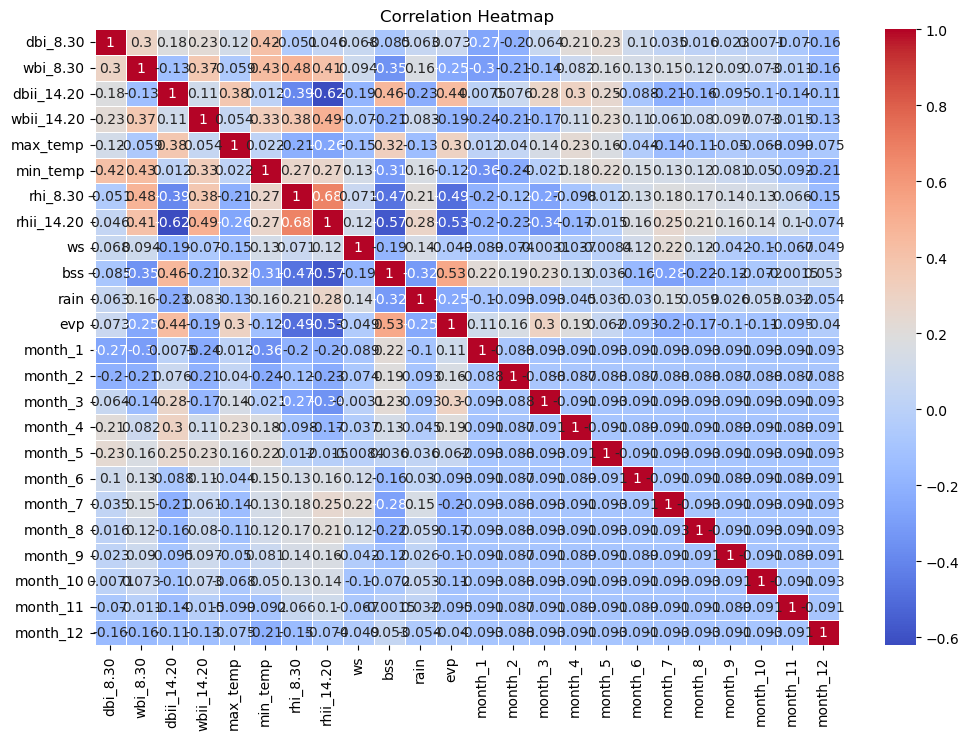

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data_frame.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [108]:
# separate input and output variables
X = data_frame.drop(['evp'],axis=1)
y = data_frame['evp']

In [109]:
# We separated the inputs & outputs, X has inputs
X
tmp = X

In [110]:
# y has outputs
y

0       5.1
1       4.1
2       4.8
3       3.4
4       6.6
       ... 
7300    1.7
7301    3.9
7302    4.9
7303    1.8
7304    1.2
Name: evp, Length: 7305, dtype: float64

In [111]:
#  We perform scaling of data

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

X = scaler.fit_transform(X)
X

array([[13.021056  , -0.58284616,  0.50762069, ..., -0.30454056,
        -0.2991412 , -0.30454056],
       [-0.11877739, -1.58332013,  1.22947094, ..., -0.30454056,
        -0.2991412 , -0.30454056],
       [-0.4159093 , -1.72624498,  0.90864861, ..., -0.30454056,
        -0.2991412 , -0.30454056],
       ...,
       [-1.07620244, -0.4161005 , -0.05381839, ..., -0.30454056,
        -0.2991412 ,  3.28363489],
       [-0.15179205,  0.32234457, -0.33453793, ..., -0.30454056,
        -0.2991412 ,  3.28363489],
       [-0.51495327, -0.05878837,  0.34720953, ..., -0.30454056,
        -0.2991412 ,  3.28363489]])

In [112]:
# Split the data in test and train set

from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
# Length of training data we have split

len(X_train)

5844

In [114]:
# Length of testing data we have split

len(X_test)

1461

In [115]:
# Show training data after transformation
X_train

array([[ 0.21136918,  0.36998619,  0.90864861, ..., -0.30454056,
        -0.2991412 , -0.30454056],
       [ 0.93769163, -0.4161005 ,  0.18679836, ..., -0.30454056,
        -0.2991412 , -0.30454056],
       [ 1.26783819,  1.77541391,  1.55029327, ..., -0.30454056,
        -0.2991412 , -0.30454056],
       ...,
       [ 0.27739849,  0.6558359 , -0.57515468, ...,  3.28363489,
        -0.2991412 , -0.30454056],
       [ 0.93769163,  0.27470296,  2.3523491 , ..., -0.30454056,
        -0.2991412 , -0.30454056],
       [-0.4159093 , -0.67812939,  0.30710673, ..., -0.30454056,
         3.34290293, -0.30454056]])

In [116]:
# Show training expected outputs, these are used to
# validate the model output in each epoch
y_train

565     1.9
6301    7.4
7036    6.3
640     2.7
6152    1.0
       ... 
5191    3.1
5226    1.7
5390    0.8
860     4.3
7270    2.1
Name: evp, Length: 5844, dtype: float64

In [117]:
# Show testing data after transformation
X_test

array([[ 0.5745304 ,  0.82258156,  0.90864861, ..., -0.30454056,
        -0.2991412 , -0.30454056],
       [ 0.17835452,  0.53673185,  1.42998489, ..., -0.30454056,
        -0.2991412 , -0.30454056],
       [ 0.54151574,  0.82258156, -1.49751888, ...,  3.28363489,
        -0.2991412 , -0.30454056],
       ...,
       [ 1.46592613,  1.27517693,  0.82844302, ..., -0.30454056,
        -0.2991412 , -0.30454056],
       [-0.6470119 , -0.24935484, -0.77566863, ..., -0.30454056,
         3.34290293, -0.30454056],
       [-0.91112915, -0.72577101,  0.14669557, ..., -0.30454056,
         3.34290293, -0.30454056]])

In [118]:
pandas.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.574530,0.822582,0.908649,0.744131,1.099889,0.223433,0.780305,-0.197806,0.042811,0.377992,...,-0.304541,-0.299141,3.283635,-0.299141,-0.304541,-0.304541,-0.299141,-0.304541,-0.299141,-0.304541
1,0.178355,0.536732,1.429985,0.833274,0.692518,0.432117,0.780305,-0.521271,-0.873417,-0.461653,...,-0.304541,-0.299141,-0.304541,3.342903,-0.304541,-0.304541,-0.299141,-0.304541,-0.299141,-0.304541
2,0.541516,0.822582,-1.497519,-0.102723,-1.320373,0.779924,0.823332,1.373313,2.440598,-1.707578,...,-0.304541,-0.299141,-0.304541,-0.299141,-0.304541,-0.304541,-0.299141,3.283635,-0.299141,-0.304541
3,0.937692,2.704425,-2.540191,1.947556,0.428925,0.014750,-0.897732,-0.012968,0.140282,1.109296,...,-0.304541,3.342903,-0.304541,-0.299141,-0.304541,-0.304541,-0.299141,-0.304541,-0.299141,-0.304541
4,0.772618,0.917865,-0.093921,0.877845,0.812333,1.197292,0.694252,0.865010,-0.230108,-1.220042,...,-0.304541,3.342903,-0.304541,-0.299141,-0.304541,-0.304541,-0.299141,-0.304541,-0.299141,-0.304541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,-0.713041,-0.130251,-0.775669,-0.414722,0.261184,-0.854767,0.694252,0.264288,-0.152131,-0.109544,...,-0.304541,-0.299141,-0.304541,-0.299141,-0.304541,-0.304541,-0.299141,-0.304541,-0.299141,3.283635
1457,0.211369,0.465269,-0.535052,0.432132,-0.673372,0.745143,0.608199,0.818800,0.198764,-1.572151,...,-0.304541,-0.299141,-0.304541,-0.299141,-0.304541,3.283635,-0.299141,-0.304541,-0.299141,-0.304541
1458,1.465926,1.275177,0.828443,1.323558,0.932148,1.058169,0.479119,0.356707,-0.892911,0.973869,...,-0.304541,-0.299141,-0.304541,3.342903,-0.304541,-0.304541,-0.299141,-0.304541,-0.299141,-0.304541
1459,-0.647012,-0.249355,-0.775669,0.432132,0.021554,-0.228715,0.393066,1.096057,-0.697969,0.459248,...,-0.304541,-0.299141,-0.304541,-0.299141,-0.304541,-0.304541,-0.299141,-0.304541,3.342903,-0.304541


In [119]:
y_test

7061    2.8
4553    0.0
6504    0.0
1918    8.2
5227    3.3
       ... 
6932    1.3
2045    1.3
527     3.6
1783    2.6
5065    0.2
Name: evp, Length: 1461, dtype: float64

In [120]:
# tensorflow package keras is used to develop ANNs
import keras

In [121]:
# we create model for the ANN
model = keras.Sequential([
    keras.layers.Dense(X.shape[1], activation=keras.activations.relu, input_dim=X.shape[1]),
    # keras.layers.Dense(11, activation=keras.activations.relu, input_dim=X.shape[1]),
    keras.layers.Dense(100, activation=keras.activations.relu),
    keras.layers.Dense(20, activation=keras.activations.relu),
    keras.layers.Dense(8, activation=keras.activations.relu),
    keras.layers.Dense(1)
])

In [122]:
# model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['mae'])
model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.Adam(learning_rate=0.000001), metrics=['mae'])

In [123]:
# history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
history = model.fit(X_train, y_train, batch_size=32, epochs=1500, validation_data=(X_test, y_test),
                    callbacks=[keras.callbacks.EarlyStopping(patience=100)],
                    use_multiprocessing=True,
                    workers=8)

Epoch 1/1500


183/183 [==============================] - 1s 2ms/step - loss: 11.2569 - mae: 2.7246 - val_loss: 11.1844 - val_mae: 2.7198
Epoch 2/1500
183/183 [==============================] - 0s 2ms/step - loss: 11.1722 - mae: 2.7115 - val_loss: 11.1003 - val_mae: 2.7070
Epoch 3/1500
183/183 [==============================] - 0s 2ms/step - loss: 11.0866 - mae: 2.6982 - val_loss: 11.0147 - val_mae: 2.6940
Epoch 4/1500
183/183 [==============================] - 0s 2ms/step - loss: 10.9995 - mae: 2.6848 - val_loss: 10.9277 - val_mae: 2.6807
Epoch 5/1500
183/183 [==============================] - 0s 2ms/step - loss: 10.9109 - mae: 2.6713 - val_loss: 10.8385 - val_mae: 2.6671
Epoch 6/1500
183/183 [==============================] - 0s 2ms/step - loss: 10.8208 - mae: 2.6573 - val_loss: 10.7475 - val_mae: 2.6531
Epoch 7/1500
183/183 [==============================] - 0s 2ms/step - loss: 10.7289 - mae: 2.6432 - val_loss: 10.6558 - val_mae: 2.6389
Epoch 8/1500
183/183 [==============================] - 0s 2m

In [131]:
# Evaluate the model
print(f"Metics on Test Set")
mse = model.evaluate(X_test, y_test)

# [2.2920491695404053, 1.127738118171692]
# 2.136467933654785, 1.072235107421875

Metics on Test Set
46/46 [==============================] - 0s 1ms/step - loss: 2.1365 - mae: 1.0722


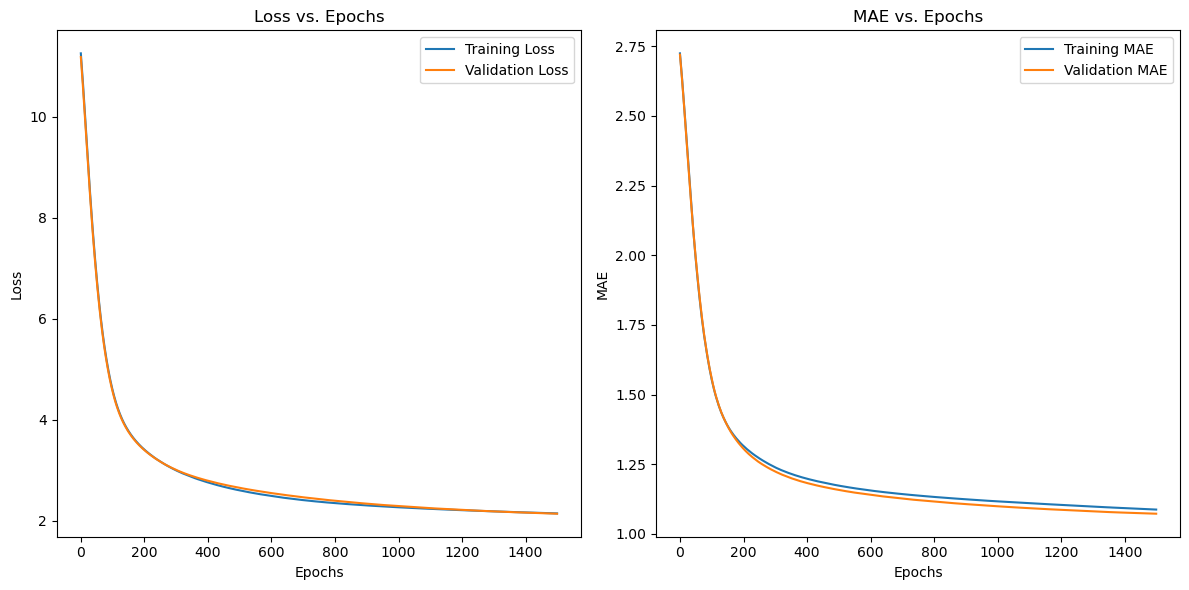

In [125]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Epochs')

# Plot training and validation MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('MAE vs. Epochs')

plt.tight_layout()
plt.show()

In [126]:
# for layer in model.layers:
#   print(layer.get_config(), layer.get_weights())

In [127]:
# saving model for future use
model.save('my_model.h5')

In [128]:
import keras
# use previously saved mode
old_model = keras.models.load_model('my_model.h5')

# Show the model architecture
old_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 23)                552       
                                                                 
 dense_21 (Dense)            (None, 100)               2400      
                                                                 
 dense_22 (Dense)            (None, 20)                2020      
                                                                 
 dense_23 (Dense)            (None, 8)                 168       
                                                                 
 dense_24 (Dense)            (None, 1)                 9         
                                                                 
Total params: 5,149
Trainable params: 5,149
Non-trainable params: 0
_________________________________________________________________


## Expected values for the below example is 2.8

In [129]:
# importing numpy
import numpy
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

# manual testing by providing input variables
single_row = [10.6,10.6,15.4,13.6,19.8,8.9,100,82,5,8.7,0,2]

# performing scaling as we did on our training data
scaled_single_row = scaler.fit_transform(numpy.array(single_row).reshape(1, -1))

# predicting the output
predictions = old_model.predict(scaled_single_row)

# printing the predictions
predictions[0][0]

ValueError: in user code:

    File "e:\SOFTWARES\anaconda3\envs\major_project_env\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "e:\SOFTWARES\anaconda3\envs\major_project_env\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "e:\SOFTWARES\anaconda3\envs\major_project_env\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "e:\SOFTWARES\anaconda3\envs\major_project_env\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "e:\SOFTWARES\anaconda3\envs\major_project_env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "e:\SOFTWARES\anaconda3\envs\major_project_env\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 23), found shape=(None, 12)
